In [3]:
library(fpp2)
library(astsa)

In [4]:
df = austourists
df

,Qtr1,Qtr2,Qtr3,Qtr4
1999,30.05251,19.14850,25.31769,27.59144
2000,32.07646,23.48796,28.47594,35.12375
2001,36.83848,25.00702,30.72223,28.69376
2002,36.64099,23.82461,29.31168,31.77031
2003,35.17788,19.77524,29.60175,34.53884
2004,41.27360,26.65586,28.27986,35.19115
2005,42.20566,24.64917,32.66734,37.25735
2006,45.24246,29.35048,36.34421,41.78208
2007,49.27660,31.27540,37.85063,38.83704
2008,51.23690,31.83855,41.32342,42.79900


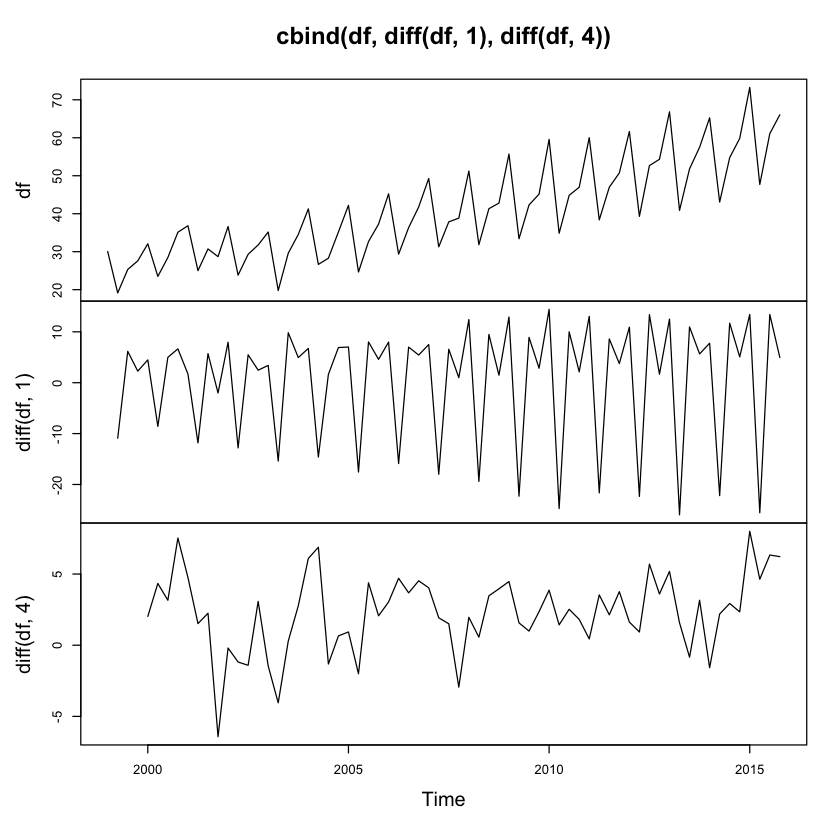

In [14]:
plot.ts(cbind(df, diff(df, 1), diff(df, 4)))

#### NHẬN XÉT
1. Dữ liệu gốc (df):
- Dữ liệu gốc thể hiện một xu hướng tăng ổn định qua thời gian, kèm theo sự biến động mang tính chu kỳ (mùa vụ) rõ rệt.
- Biểu đồ này cho thấy dữ liệu không dừng (non-stationary), do có xu hướng tăng và thành phần mùa vụ.
2. Hiệu số bậc 1 (diff(df, 1)):
- Sau khi lấy sai phân bậc 1, xu hướng tăng đã được loại bỏ, và chuỗi trở nên xoay quanh giá trị trung bình bằng 0.
- Tuy nhiên, thành phần dao động chu kỳ vẫn còn, điều này cho thấy rằng dữ liệu vẫn có tính mùa vụ và cần thêm xử lý.
3. Hiệu số bậc 4 (diff(df, 4)):
- Sai phân bậc 4 đã loại bỏ một số thành phần chu kỳ (mùa vụ với chu kỳ 4), nhưng chuỗi vẫn chưa hoàn toàn dừng. Một số dao động vẫn hiện diện, nhưng giảm so với bậc 1.

ACF,-0.52,0.05,-0.47,0.90,-0.47,0.04,-0.45,0.86,-0.46,0.05,-0.41,0.78,-0.41,0.03,-0.37,0.72,-0.38,0.03,-0.34
PACF,-0.52,-0.31,-0.91,0.11,0.10,0.03,-0.20,0.10,-0.08,-0.05,0.09,-0.07,0.13,0.05,0.07,0.04,0.06,0.06,0.04


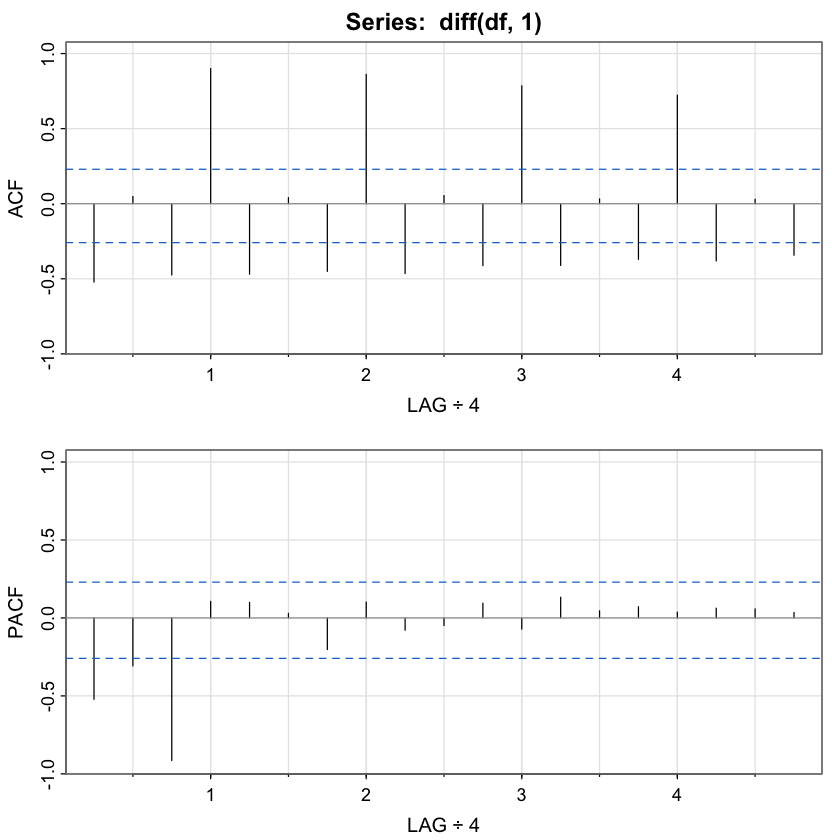

In [6]:
acf2(diff(df, 1))

1. Biểu đồ ACF: Tail off
- Có các đỉnh nổi bật tại các bậc 4, 8, 12 (theo chu kỳ 4).
- Dấu hiệu này cho thấy chuỗi dữ liệu có tính mùa vụ với chu kỳ 4.
- Sau độ trễ 12, các giá trị dần giảm xuống và dao động xung quanh 0: Tail off
- Ý nghĩa: Dữ liệu sau khi lấy hiệu số bậc 1 vẫn còn thành phần mùa vụ, với chu kỳ khoảng 4 bước thời gian. Điều này phù hợp nếu dữ liệu là theo quý hoặc mang tính mùa vụ ngắn.
2. Biểu đồ PACF: Cut off after 3
- PACF giảm mạnh sau độ trễ 1 và trở nên không đáng kể sau đó, ngoại trừ một vài giá trị ở các độ trễ cao hơn.
- Một số giá trị nhỏ ở các bậc 4, 8 cho thấy yếu tố mùa vụ vẫn có vai trò, nhưng không mạnh.
- Ý nghĩa: PACF giảm dần sau độ trễ 3, điều này gợi ý rằng mô hình ARIMA có thể sử dụng p = 3 (AR bậc 3) để mô hình hóa phần tự hồi quy.

### THỬ MÔ HÌNH

initial  value 1.150814 
iter   2 value 1.038578
iter   3 value 1.031966
iter   4 value 1.026722
iter   5 value 1.026440
iter   6 value 1.026425
iter   7 value 1.026425
iter   7 value 1.026425
iter   7 value 1.026425
final  value 1.026425 
converged
initial  value 1.026756 
iter   2 value 1.026583
iter   3 value 1.026566
iter   4 value 1.026566
iter   4 value 1.026566
iter   4 value 1.026566
final  value 1.026566 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
    Estimate     SE t.value p.value
ar1  -0.4726 0.1247 -3.7892  0.0004
ar2  -0.0854 0.1372 -0.6222  0.5362
ar3   0.1223 0.1258  0.9720  0.3350

sigma^2 estimated as 7.756422 on 60 degrees of freedom 
 
AIC = 5.017992  AICc = 5.024449  BIC = 5.154064 
 


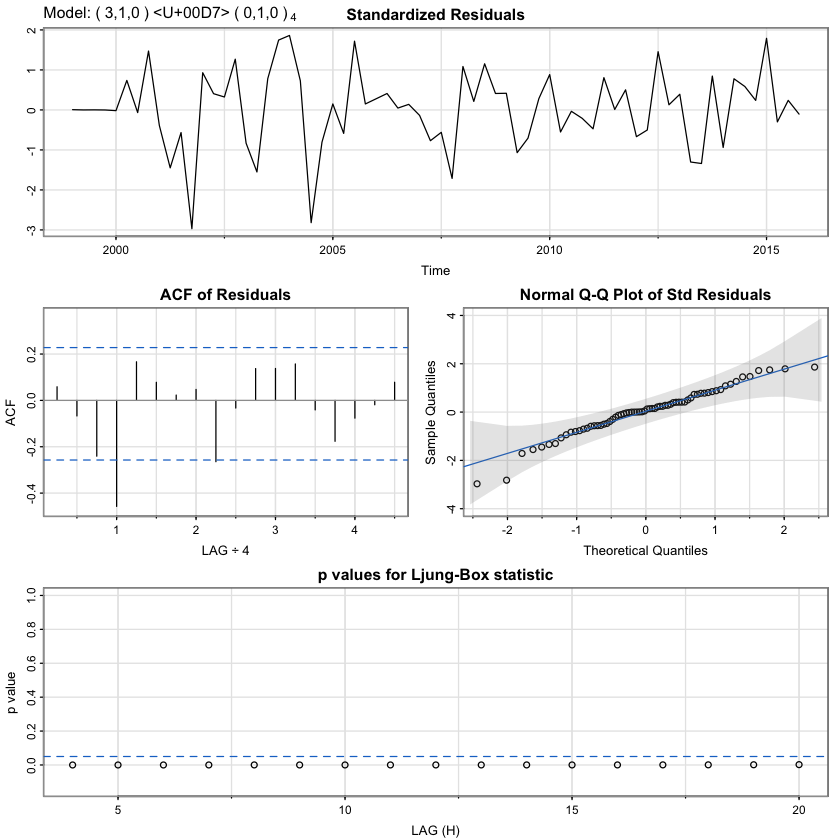

In [7]:
sarima(df, 3, 1, 0, 0, 1, 0, 4)

initial  value 1.017922 
iter   2 value 0.960384
iter   3 value 0.949189
iter   4 value 0.949107
iter   5 value 0.949104
iter   6 value 0.949104
iter   6 value 0.949104
iter   6 value 0.949104
final  value 0.949104 
converged
initial  value 0.932171 
iter   2 value 0.932063
iter   3 value 0.932054
iter   4 value 0.932054
iter   4 value 0.932054
iter   4 value 0.932054
final  value 0.932054 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1        0.2944 0.1243  2.3677  0.0211
ar2        0.1554 0.1294  1.2015  0.2343
ar3       -0.0684 0.1260 -0.5426  0.5894
constant   0.5809 0.1275  4.5550  0.0000

sigma^2 estimated as 6.433402 on 60 degrees of freedom 
 
AIC = 4.858234  AICc = 4.868828  BIC = 5.026897 
 


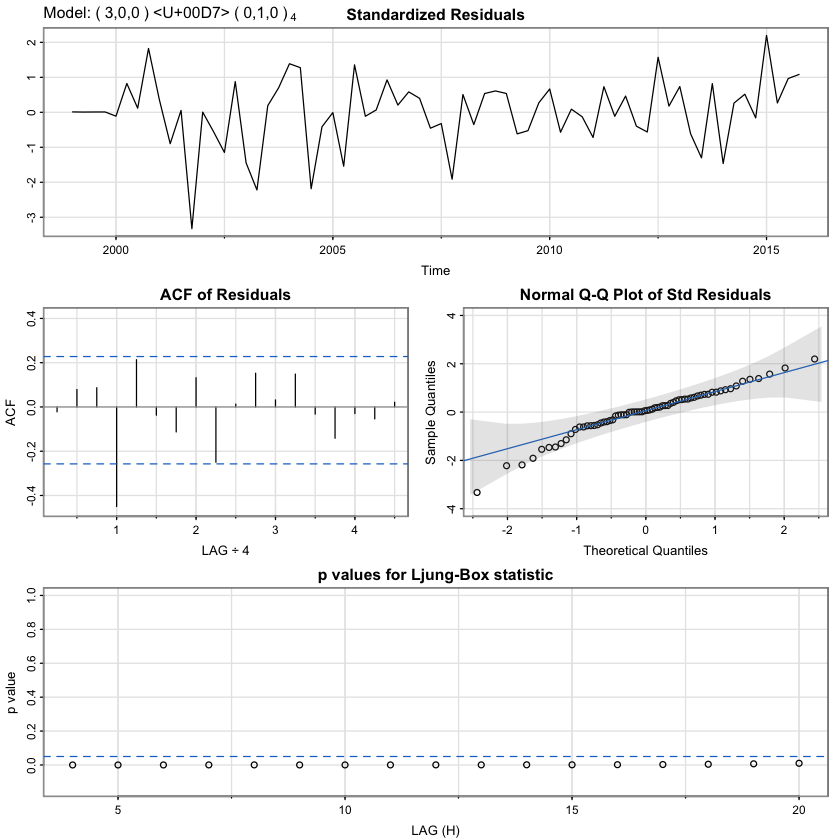

In [8]:
sarima(df, 3, 0, 0, 0, 1, 0, 4)

## NHẬN XÉT
- Mô hình 1: SARIMA(3,1,0)(0,1,0,4)
    - AIC: 5.017992
    - AICc: 5.024449
    - BIC: 5.154064
    - Sigma^2: 7.756422
    - Hệ số quan trọng (p-value < 0.05): ar1 (-0.4726, p=0.0004).
- Mô hình 2: SARIMA(3,0,0)(0,1,0,4)
    - AIC: 4.858234
    - AICc: 4.868828
    - BIC: 5.026897
    - Sigma^2: 6.433402
    - Hệ số quan trọng (p-value < 0.05): ar1 (0.2944, p=0.0211).
- So sánh:
    - AIC và AICc: Mô hình 2 có giá trị AIC và AICc thấp hơn, cho thấy nó phù hợp hơn so với Mô hình 1.
    - BIC: Mô hình 2 cũng có giá trị BIC thấp hơn, củng cố thêm việc mô hình 2 tốt hơn.
    - Sigma^2: Mô hình 2 có sigma^2 thấp hơn (6.433402 so với 7.756422), cho thấy nó có độ sai lệch nhỏ hơn.
    - Hệ số quan trọng: Mô hình 1 có hệ số ar1 với giá trị p thấp (0.0004), cho thấy tính quan trọng cao. Tuy nhiên, Mô hình 2 cũng có một hệ số quan trọng là ar1 (p=0.0211).
- Kết luận:
Dựa trên AIC, BIC, và Sigma^2, Mô hình 2 (SARIMA(3,0,0)(0,1,0,4)) là lựa chọn tốt hơn vì nó có độ phù hợp cao hơn và sai số nhỏ hơn.

#### THỰC HIỆN DỰ BÁO DỰA TRÊN MÔ HÌNH 2 CHO 8 QUÝ TIẾP THEO

,Qtr1,Qtr2,Qtr3,Qtr4
2016,77.19398,50.82674,63.64318,68.45979
2017,79.52067,53.14864,65.96132,70.78137
,Qtr1,Qtr2,Qtr3,Qtr4
2016,2.536415,2.644054,2.714432,2.717239
2017,3.772657,3.846041,3.895455,3.897285


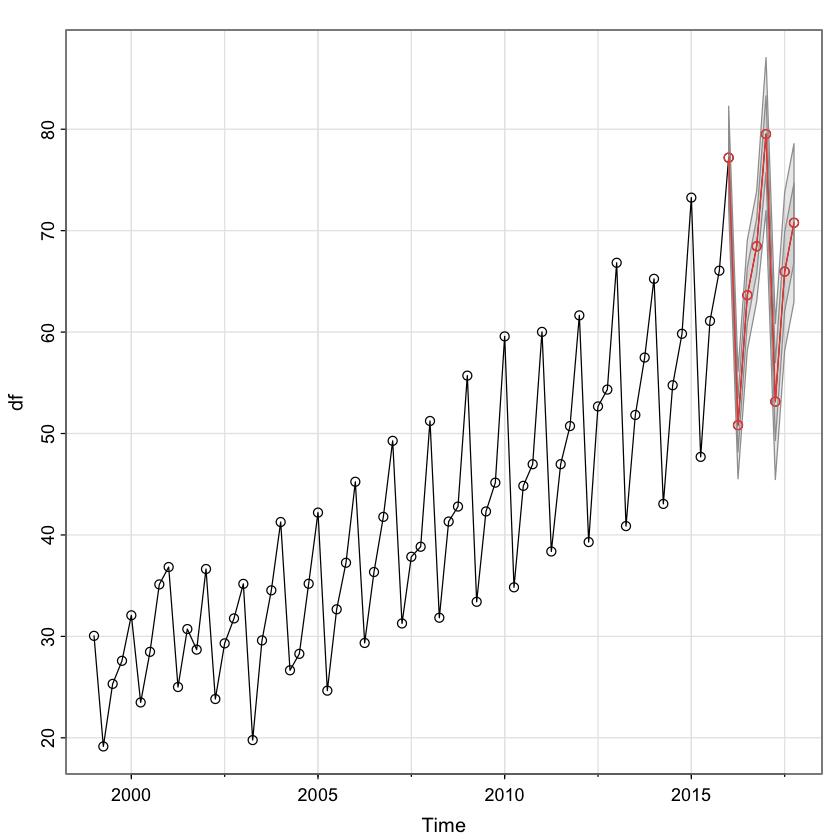

In [9]:
model_2 = sarima.for(df, n.ahead = 8, 3, 0, 0, 0, 1, 0, 4)
model_2

In [10]:
# Giá trị dự báo
forecast <- model_2$pred

# Sai số chuẩn
se <- model_2$se

# Tính khoảng tin cậy 95%
z <- 1.96  # Hệ số cho mức ý nghĩa 95%
lower_bound <- forecast - z * se
upper_bound <- forecast + z * se


In [11]:
print("lower")
lower_bound
print("upper")
upper_bound

[1] "lower"


,Qtr1,Qtr2,Qtr3,Qtr4
2016,72.22261,45.64439,58.32289,63.13400
2017,72.12626,45.61040,58.32623,63.14269


[1] "upper"


,Qtr1,Qtr2,Qtr3,Qtr4
2016,82.16536,56.00908,68.96347,73.78558
2017,86.91507,60.68688,73.59642,78.42005


#### NHẬN XÉT CÁC GIÁ TRỊ DỰ BÁO MÔ HÌNH ĐƯA RA CÓ KHỚP VỚI DỮ LIỆU HAY KHÔNG

- Dự báo trong khoảng xu hướng tăng của dữ liệu: Giá trị dự báo (đường màu đỏ) dường như tiếp tục xu hướng tăng tổng quát của dữ liệu trong quá khứ. Điều này là phù hợp với sự biến động theo chu kỳ và xu hướng tăng của dữ liệu thực tế.
- Phạm vi khoảng tin cậy: Khoảng tin cậy (dải xám) khá hẹp, đặc biệt trong những bước đầu của dự báo, cho thấy mô hình khá tự tin về dự báo. Tuy nhiên, ở các bước xa hơn (cuối cùng), khoảng tin cậy mở rộng, điều này là bình thường do độ không chắc chắn tăng dần khi dự báo xa hơn.
Mức độ khớp với các giá trị quan sát trước đó:

- Giá trị dự báo nằm khá sát với giá trị quan sát trong quá khứ (đường màu đen), đặc biệt ở các phần gần hơn với thời điểm cuối của dữ liệu gốc. Điều này gợi ý rằng mô hình đã học tốt xu hướng và các mẫu chu kỳ từ dữ liệu
#### KẾT LUẬN
- Dự báo tổng quát khớp với xu hướng của dữ liệu, và các giá trị dự báo nằm trong khoảng phù hợp với dữ liệu đã quan sát.